### Importing libraries

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kstest, beta

### Problem Definition & Goal Setting

This project intends to find some valuable patterns to boost one's productivity. It will consider variables like caffeine intake, work hours, exercise and others. The target variable will be the Productivity Score from the dataset described in the README document, and I will also leave a link to the dataset here.

The project will be seen from two perspectives: regression and classification.

### Data Collection

I used data from kaggle. Here is the link:
[Raw Data](https://www.kaggle.com/datasets/adilshamim8/sleep-cycle-and-productivity)

In [51]:
df = pd.read_csv("../data/raw/sleep_cycle_productivity.csv")

In [52]:
df.head()

Date  Person_ID  Age  Gender  Sleep Start Time  Sleep End Time  \
0  2024-04-12       1860   32   Other             23.33            4.61   
1  2024-11-04       1769   41  Female             21.02            2.43   
2  2024-08-31       2528   20    Male             22.10            3.45   
3  2024-02-22       8041   37   Other             23.10            6.65   
4  2024-02-23       4843   46   Other             21.42            4.17   

   Total Sleep Hours  Sleep Quality  Exercise (mins/day)  \
0               5.28              3                   86   
1               5.41              5                   32   
2               5.35              7                   17   
3               7.55              8                   46   
4               6.75             10                   61   

   Caffeine Intake (mg)  Screen Time Before Bed (mins)  Work Hours (hrs/day)  \
0                    87                            116              8.808920   
1                    21                             88              6.329833   
2                    88                             59              8.506306   
3                    34                             80              6.070240   
4                   269                             94             11.374994   

   Productivity Score  Mood Score  Stress Level  
0                   8           3             6  
1                  10           3             7  
2                  10           9            10  
3                   8           4             2  
4                   8           7             9

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Date                           5000 non-null   object 
 1   Person_ID                      5000 non-null   int64  
 2   Age                            5000 non-null   int64  
 3   Gender                         5000 non-null   object 
 4   Sleep Start Time               5000 non-null   float64
 5   Sleep End Time                 5000 non-null   float64
 6   Total Sleep Hours              5000 non-null   float64
 7   Sleep Quality                  5000 non-null   int64  
 8   Exercise (mins/day)            5000 non-null   int64  
 9   Caffeine Intake (mg)           5000 non-null   int64  
 10  Screen Time Before Bed (mins)  5000 non-null   int64  
 11  Work Hours (hrs/day)           5000 non-null   float64
 12  Productivity Score             5000 non-null   i

From the data structure above, we see no missing values, simplifying the task. However, a few columns will need transformation to analyse productivity and make a predictive model.

### Setting up aesthetics

In [54]:
# Reset styles
sns.set()
plt.style.use("default")
plt.rcdefaults()

# Apply Seaborn dark theme
sns.set_style("darkgrid")

# Define a custom soft purple palette
custom_palette = ["#64527b", "#9073a0", "#b29cc3", "#d8bfd8"]
sns.set_palette(custom_palette)  # Set Seaborn palette

# Set Matplotlib dark background
plt.style.use("dark_background")

# Override Matplotlib’s default color cycle with the custom colors
plt.rcParams["axes.prop_cycle"] = plt.cycler(color=custom_palette)

# Force Matplotlib to respect fill and edge colors
plt.rcParams.update({
    "axes.facecolor": "#1e1e1e",
    "figure.facecolor": "#1e1e1e",
    "axes.labelcolor": "white",
    "xtick.color": "white",
    "ytick.color": "white",
    "text.color": "white",
    "axes.edgecolor": "white",
    "grid.color": "#444444",
    "patch.facecolor": "#64527b",  # Default fill color for bars, violins, etc.
    "patch.edgecolor": "white",
    "lines.color": "#b29cc3", 
    "boxplot.whiskerprops.color": "white",
    "boxplot.capprops.color": "white",
})


### Data validation

In [55]:
# Checking if there are any duplicates at all
df.duplicated().any()

np.False_

In [56]:
summary_df = pd.DataFrame()
summary_df['Number Unique Values'] = df.nunique()
print(summary_df)

                               Number Unique Values
Date                                            366
Person_ID                                      3858
Age                                              42
Gender                                            3
Sleep Start Time                                240
Sleep End Time                                  817
Total Sleep Hours                               501
Sleep Quality                                    10
Exercise (mins/day)                              90
Caffeine Intake (mg)                            300
Screen Time Before Bed (mins)                   180
Work Hours (hrs/day)                           5000
Productivity Score                               10
Mood Score                                       10
Stress Level                                     10


In [57]:
df.drop(["Date", "Person_ID"], axis=1).describe()

Age  Sleep Start Time  Sleep End Time  Total Sleep Hours  \
count  5000.000000       5000.000000     5000.000000        5000.000000   
mean     38.590600         22.005350        4.980262           6.974902   
std      12.302799          1.157591        1.862508           1.454033   
min      18.000000         20.000000        0.560000           4.500000   
25%      28.000000         21.020000        3.660000           5.690000   
50%      39.000000         22.020000        4.970000           6.960000   
75%      49.000000         23.000000        6.310000           8.210000   
max      59.000000         23.980000        9.420000           9.500000   

       Sleep Quality  Exercise (mins/day)  Caffeine Intake (mg)  \
count    5000.000000          5000.000000            5000.00000   
mean        5.520800            43.962600             146.71140   
std         2.863845            25.798541              85.83139   
min         1.000000             0.000000               0.00000   
25%         3.000000            22.000000              73.00000   
50%         5.000000            44.000000             144.00000   
75%         8.000000            66.000000             220.00000   
max        10.000000            89.000000             299.00000   

       Screen Time Before Bed (mins)  Work Hours (hrs/day)  \
count                    5000.000000           5000.000000   
mean                       91.421200              7.987873   
std                        52.079123              2.275734   
min                         0.000000              4.000067   
25%                        46.000000              6.032720   
50%                        92.000000              7.998295   
75%                       136.000000              9.905024   
max                       179.000000             11.999141   

       Productivity Score   Mood Score  Stress Level  
count         5000.000000  5000.000000   5000.000000  
mean             5.644200     5.370600      5.548000  
std              2.872221     2.835783      2.888419  
min              1.000000     1.000000      1.000000  
25%              3.000000     3.000000      3.000000  
50%              6.000000     5.000000      6.000000  
75%              8.000000     8.000000      8.000000  
max             10.000000    10.000000     10.000000

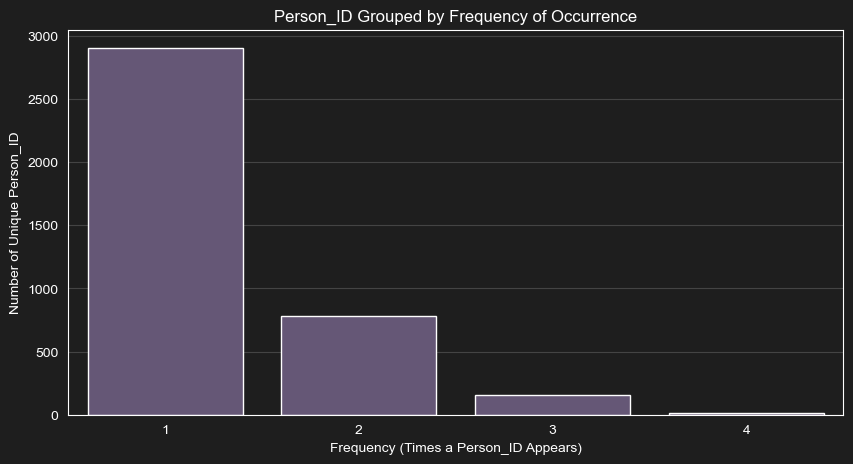

In [58]:
# Step 1: Get value counts (how many times each id appears)
id_counts = df["Person_ID"].value_counts().reset_index()

# Step 2: Group by frequency count (how many id appear 'X' times)
grouped_counts = id_counts.groupby("count").size().reset_index(name="num_id")

# Step 3: Plot the result
plt.figure(figsize=(10, 5))
sns.barplot(x=grouped_counts["count"], y=grouped_counts["num_id"])

plt.xlabel("Frequency (Times a Person_ID Appears)")
plt.ylabel("Number of Unique Person_ID")
plt.title("Person_ID Grouped by Frequency of Occurrence")
plt.show()

The dataset does not contain duplicates, which also simplifies the task. However, some people took the survey tests more than once. That can lead to some bias in our future predictive model because the productivity of a person depends on multiple factors. If the same person takes the survey multiple times, the gathered data will be useful for this group of people and may not generalize well for the entire population. So it's something that we will need to take into account and maybe even drop all responses but one from the people who took the test more than once.

### Exploratory Data Analysis

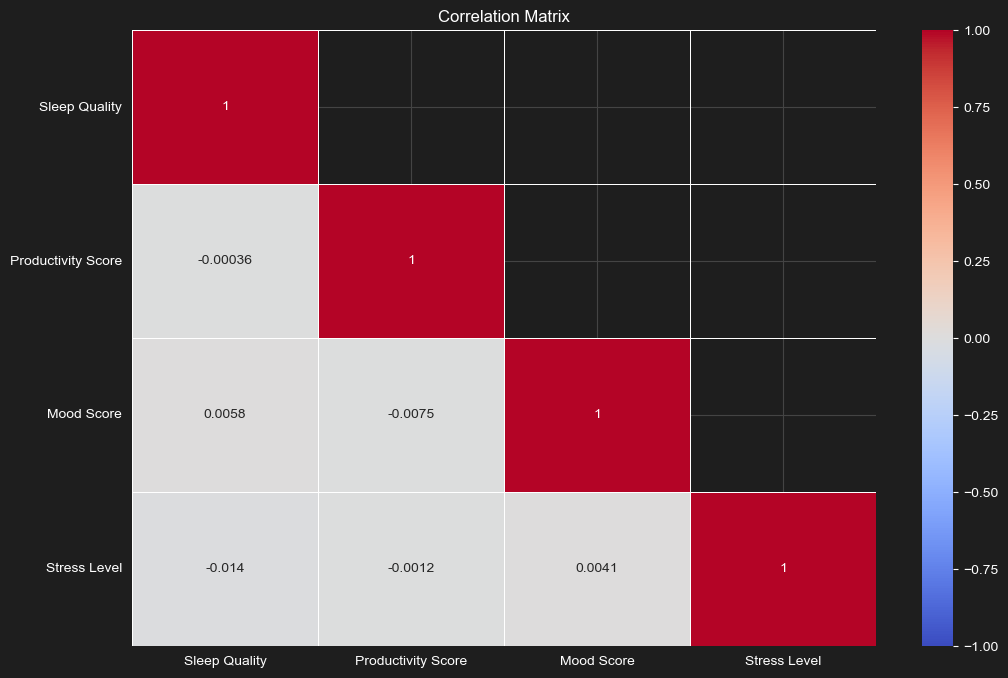

In [59]:
potential_target = df[["Sleep Quality", "Productivity Score", "Mood Score", "Stress Level"]]
# Compute correlation matrix
corr_matrix = potential_target.corr(method='spearman')

# Create mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool), k=1)

# Set up the figure size
plt.figure(figsize=(12, 8))

# Plot the heatmap
heatmap = sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, 
                      linewidths=0.5, vmin=-1, vmax=1, mask=mask)

# Customize the y-axis tick labels
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0, horizontalalignment='right')

# Add title
plt.title('Correlation Matrix')

# Display the plot
plt.show()

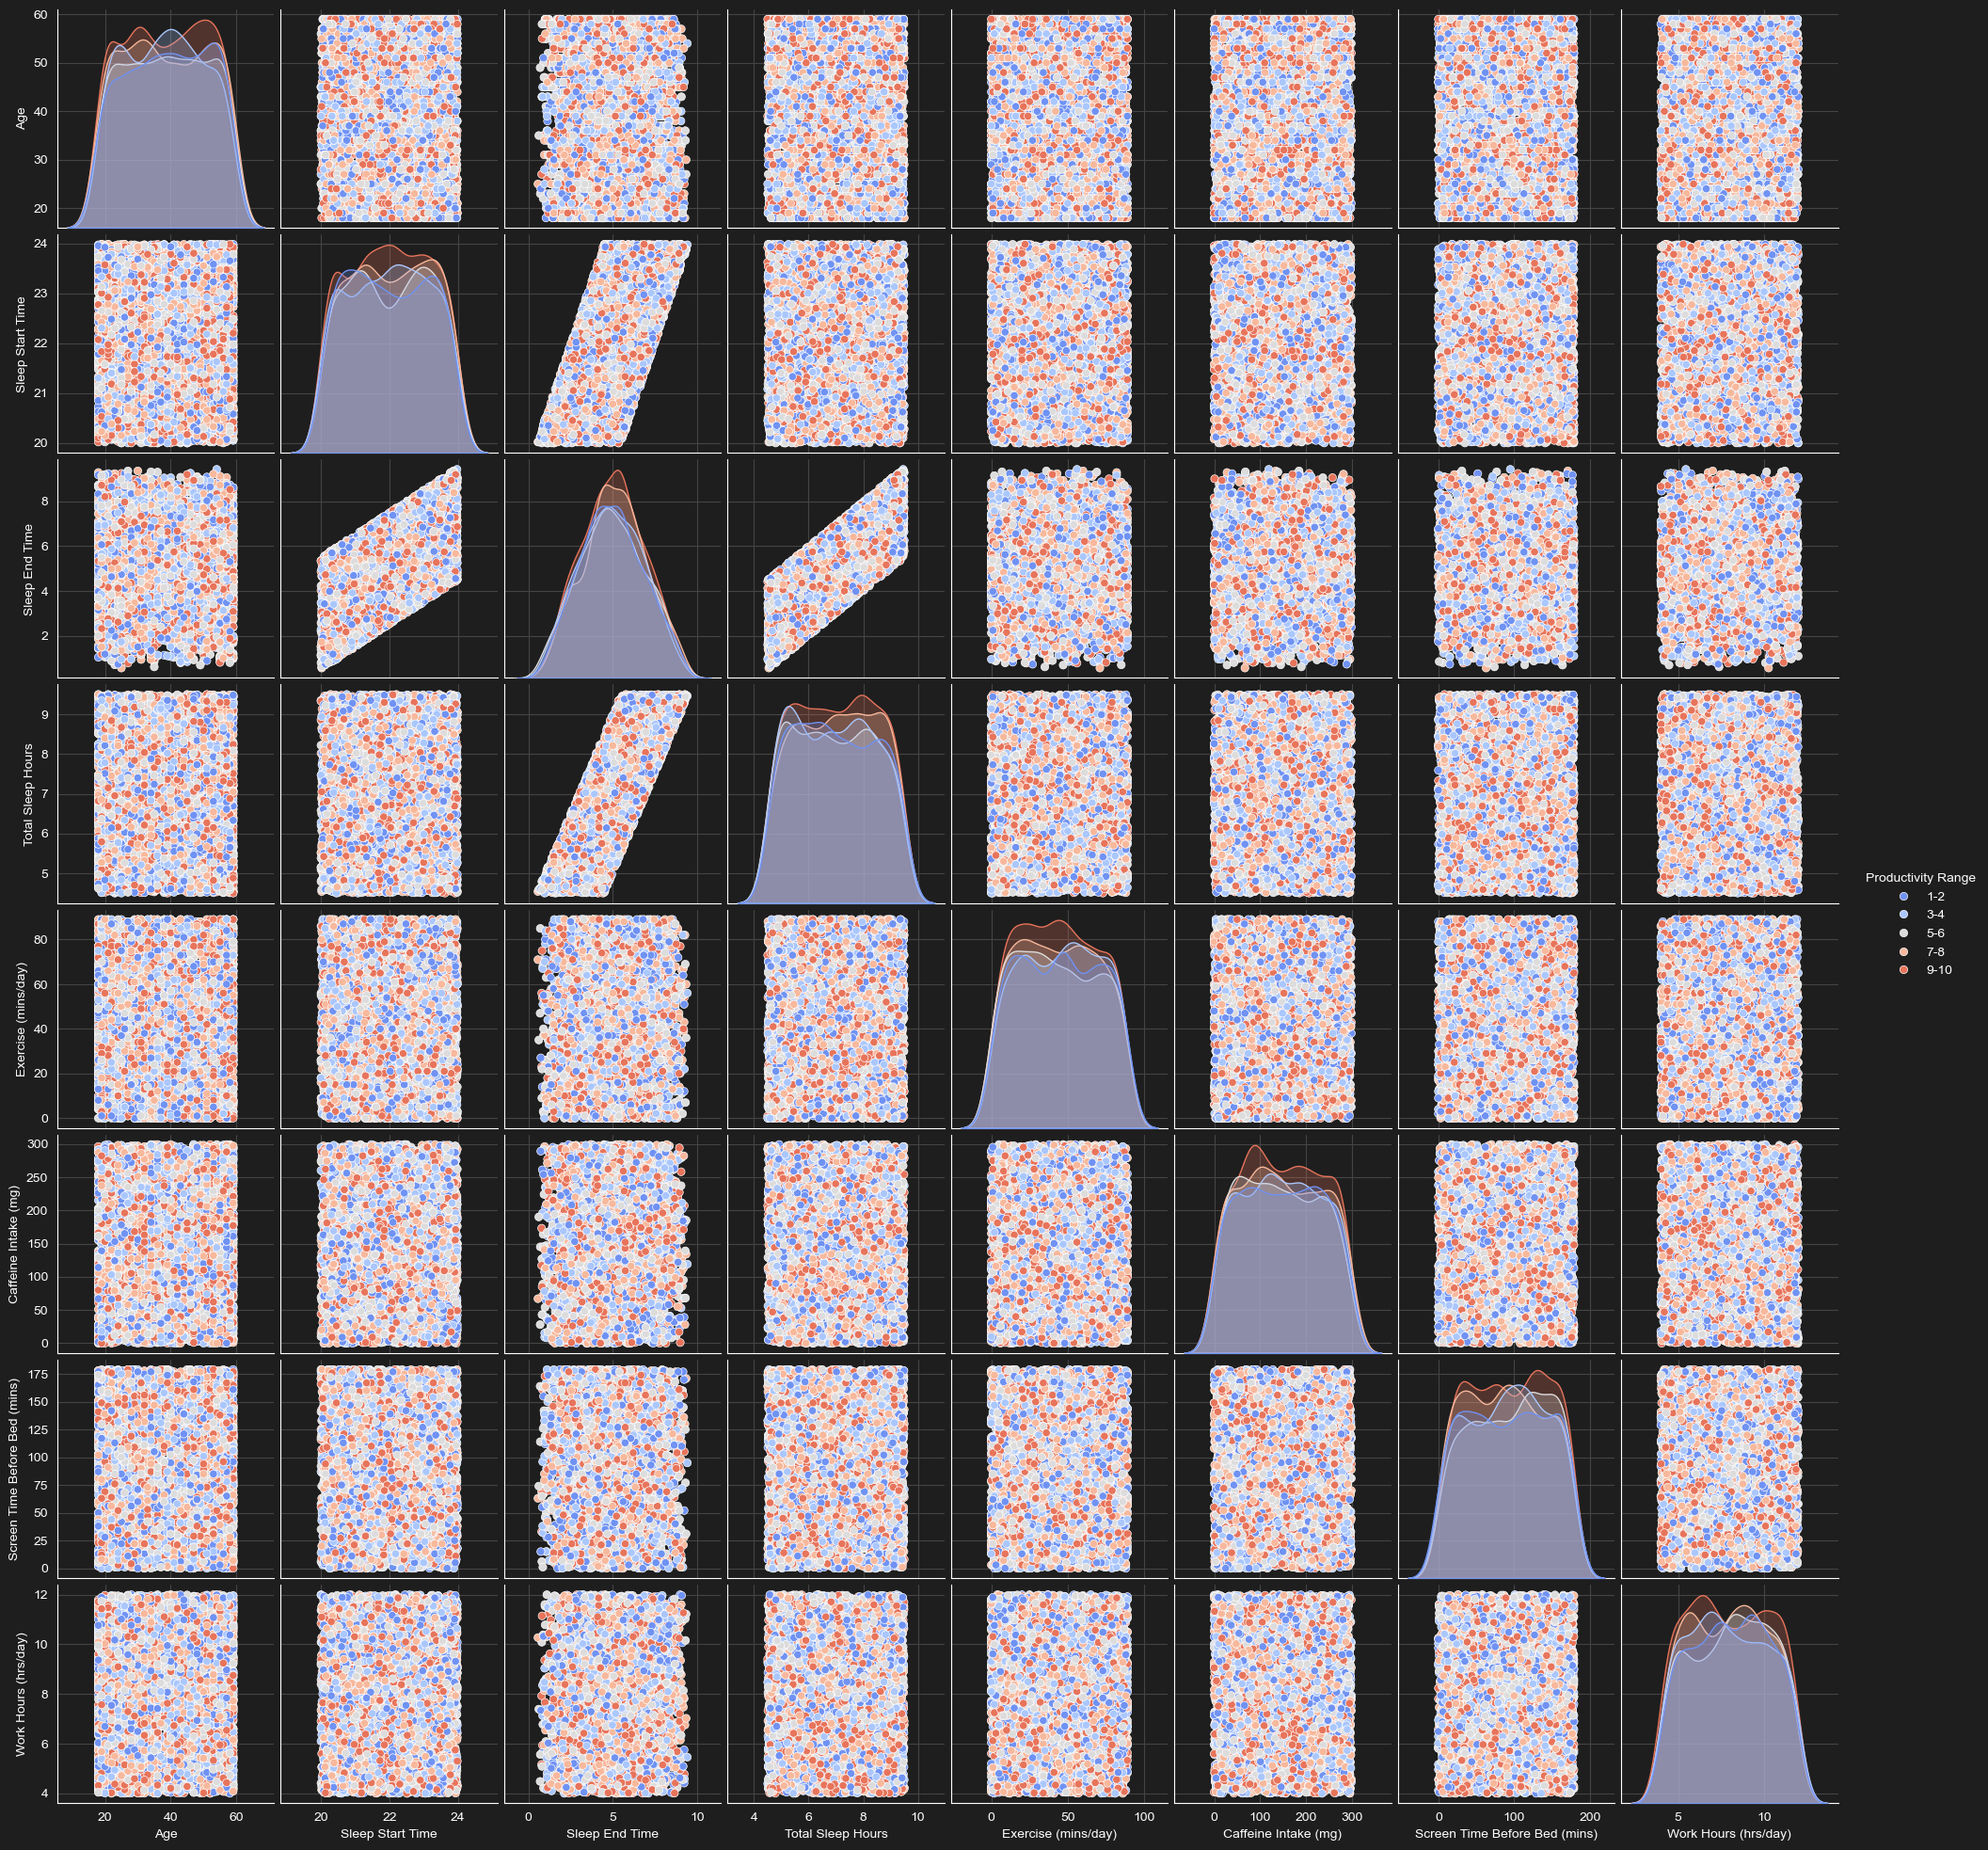

In [60]:
# Define bins and labels
bins = [0, 2, 4, 6, 8, 10]  # Bin edges
labels = ["1-2", "3-4", "5-6", "7-8", "9-10"]  # Bin labels
# Map scores into categories
df["Productivity Range"] = pd.cut(df["Productivity Score"], bins=bins, labels=labels)

features = df[["Age", "Sleep Start Time", "Sleep End Time", "Total Sleep Hours", "Exercise (mins/day)", "Caffeine Intake (mg)", "Screen Time Before Bed (mins)", "Work Hours (hrs/day)", "Productivity Range"]]

pairplot = sns.pairplot(features, hue="Productivity Range", palette="coolwarm")
plt.show()

# Save the plot
# pairplot.savefig("pairplot.png", dpi=300)

From the first two plots, it's really hard to say that data has some correlation. From the first graph, we see that there is almost no correlation between the four variables, sleep quality, productivity score, mood score and stress level, but these variables should have some relation. In fact, the data looks more like a uniform distribution rather than having a relationship. 

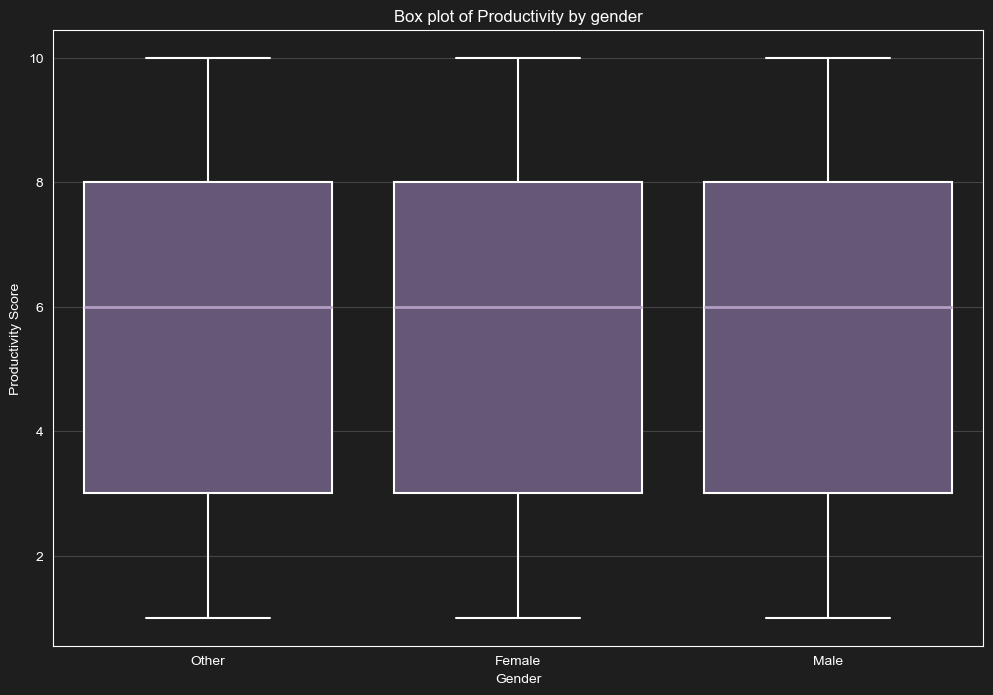

In [87]:
# Set up the figure size
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x="Gender", 
            y="Productivity Score", 
            whiskerprops={"color": "white", "linewidth": 1.5},  
            capprops={"color": "white", "linewidth": 1.5},      
            medianprops={"color": "#b29cc3", "linewidth": 2},    
            boxprops={"edgecolor": "white", "linewidth": 1.5})
# Customize plot
plt.title("Box plot of Productivity by gender")
plt.show()

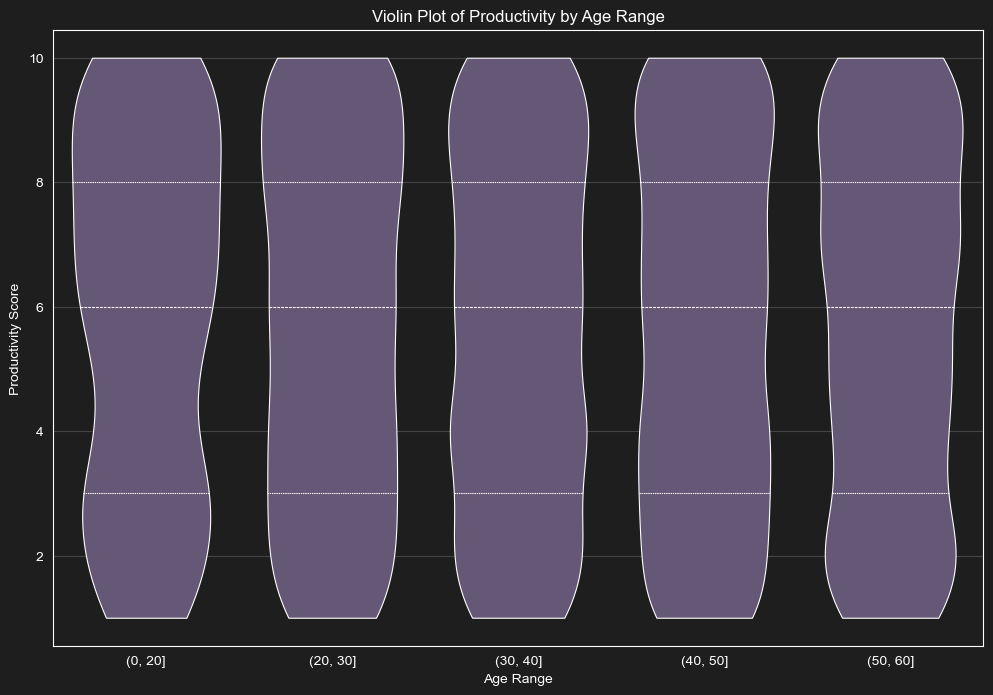

In [69]:
# Define bins and labels
bins = [0, 20, 30, 40, 50, 60]  # Bin edges

# Map scores into categories
df["Age Range"] = pd.cut(df["Age"], bins=bins)

# Create the violin plot
plt.figure(figsize=(12, 8))
sns.violinplot(x="Age Range", y="Productivity Score", data=df, edgecolor="white", linewidth=0.8, inner="quartile", cut=0)

# Customize plot
plt.title("Violin Plot of Productivity by Age Range")
plt.xlabel("Age Range")
plt.ylabel("Productivity Score")
plt.show()

Neither gender nor age appears to have a significant impact on productivity. The only noticeable difference is that individuals under 20 tend to have slightly higher productivity scores, though the variation is minimal.

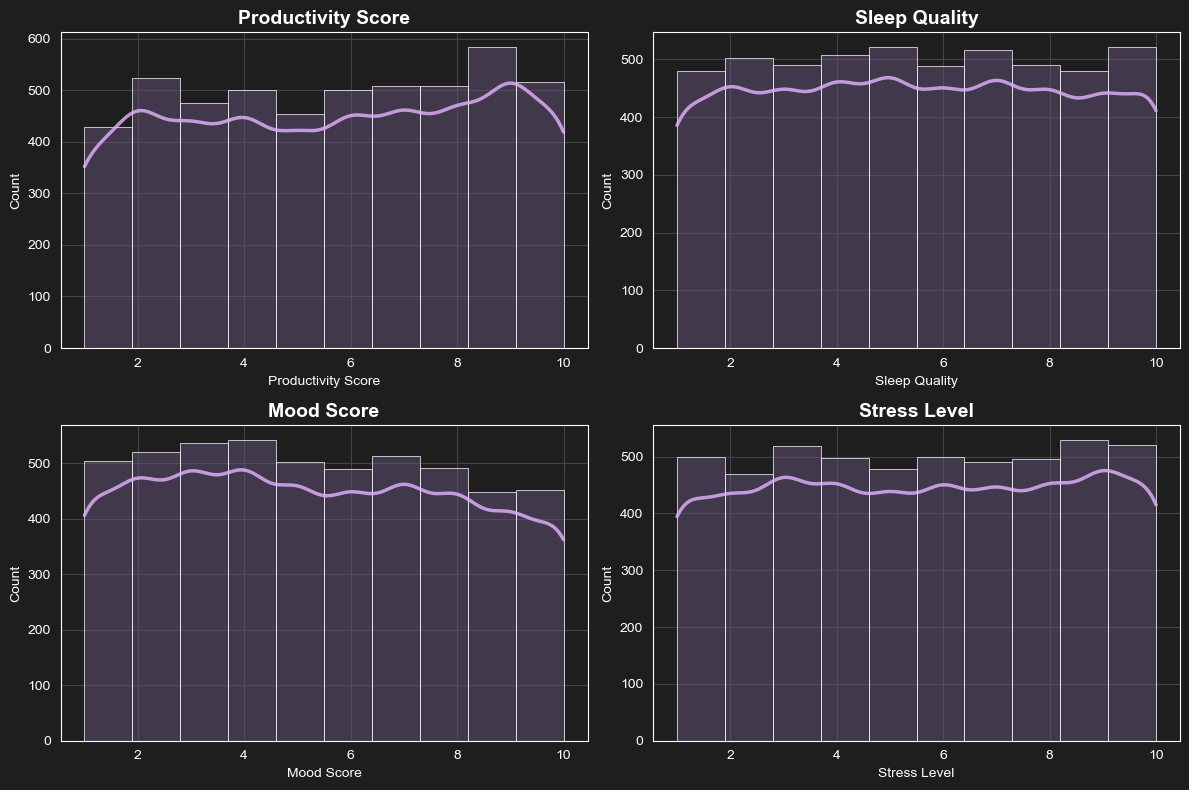

In [107]:
# Create subplots (2 rows, 2 columns)
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Define the columns to plot
columns = [
    "Productivity Score", 
    "Sleep Quality", 
    "Mood Score", 
    "Stress Level", 
]

# Flatten axes array for easier indexing
axes = axes.flatten()

# Loop through the columns and create histograms
for ax, col in zip(axes, columns):
    sns.histplot(
        data=df[col], 
        bins=10, 
        kde=True, 
        ax=ax, 
        edgecolor="white",  # Thinner, clearer edge lines
        linewidth=0.5  # Make bar edges thinner
    )
    # Customize the KDE line after plotting the histogram
    ax.lines[0].set_color("#e6b3ff")  # Set color for KDE line
    ax.lines[0].set_linewidth(2.5)  # Set width for KDE line
    ax.lines[0].set_alpha(0.8)  # Set transparency for KDE line

    ax.set_title(col, fontsize=14, fontweight="bold", color="white")  

plt.tight_layout()  
plt.show()

The discrete variables, as seen in the plots above, appear quite uniform, likely due to the data being constrained by bounded scores

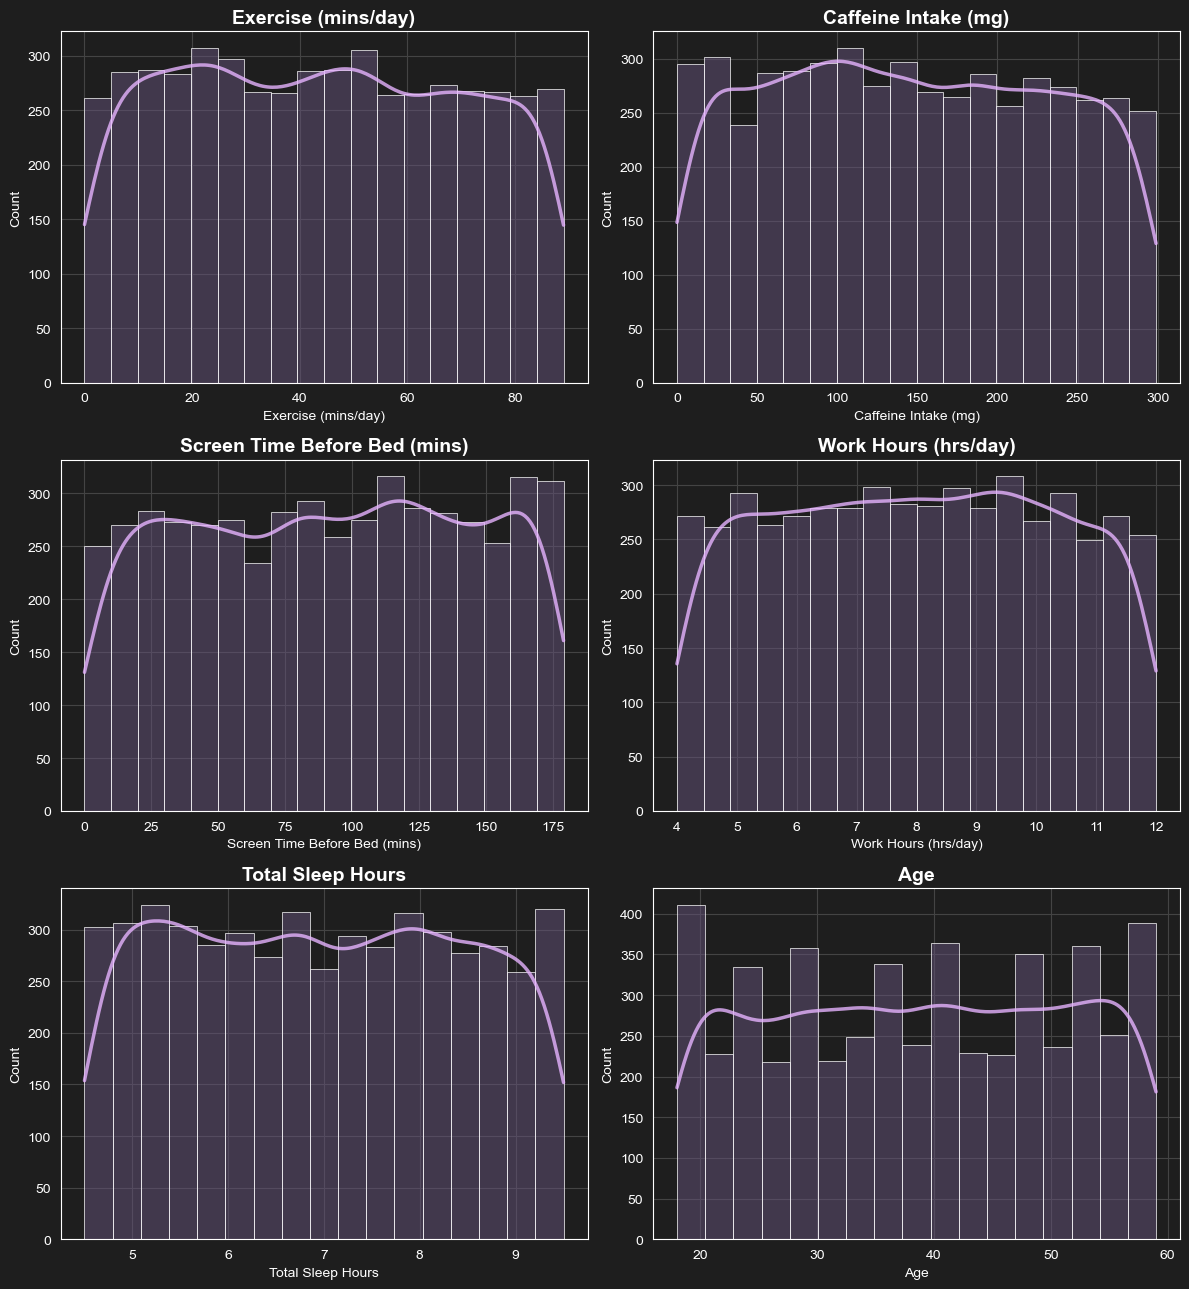

In [83]:
# Create subplots (3 rows, 2 columns)
fig, axes = plt.subplots(3, 2, figsize=(12, 13))  


# Define the columns to plot
columns = [
    "Exercise (mins/day)", 
    "Caffeine Intake (mg)", 
    "Screen Time Before Bed (mins)", 
    "Work Hours (hrs/day)", 
    "Total Sleep Hours",
    "Age"
]

# Flatten axes array for easier indexing
axes = axes.flatten()

# Loop through the columns and create histograms
for ax, col in zip(axes, columns):
    sns.histplot(
        data=df[col], 
        kde=True, 
        ax=ax, 
        edgecolor="white",  # Thinner, clearer edge lines
        linewidth=0.5  # Make bar edges thinner
    )
    # Customize the KDE line after plotting the histogram
    ax.lines[0].set_color("#e6b3ff")  # Set color for KDE line
    ax.lines[0].set_linewidth(2.5)  # Set width for KDE line
    ax.lines[0].set_alpha(0.8)  # Set transparency for KDE line

    ax.set_title(col, fontsize=14, fontweight="bold", color="white")  

plt.tight_layout()  
plt.show()

In [65]:
col = df.pop('Sleep Quality')  
df.insert(11, 'Sleep Quality', col)

col = df.pop('Age')  
df.insert(3, 'Age', col)

# Create an empty list to store results
ks_results = []

columns_of_interes = df.columns[3:11]

# Loop through numerical columns
for column in columns_of_interes:
    if df[column].min() == df[column].max():  # Skip constant columns
        ks_results.append([column, None, None])  # Store NaN values for constant columns
        continue
    stat, p_value = kstest(df[column], 'uniform', args=(df[column].min(), df[column].max() - df[column].min()))
    ks_results.append([column, stat, p_value])

# Convert to DataFrame
ks_df = pd.DataFrame(ks_results, columns=['Column', 'KS Statistic', 'p-value'])

# Display sorted results (optional)
ks_df = ks_df.sort_values(by='p-value')

# Show results
print(ks_df)

                          Column  KS Statistic       p-value
2                 Sleep End Time      0.119893  4.375948e-63
0                            Age      0.033420  2.753494e-05
6  Screen Time Before Bed (mins)      0.023139  9.310581e-03
5           Caffeine Intake (mg)      0.020950  2.447726e-02
4            Exercise (mins/day)      0.020530  2.913838e-02
1               Sleep Start Time      0.016143  1.460346e-01
3              Total Sleep Hours      0.014600  2.346138e-01
7           Work Hours (hrs/day)      0.013783  2.954928e-01


In [66]:
ks_df["p-value"] > 0.05

2    False
0    False
6    False
5    False
4    False
1     True
3     True
7     True
Name: p-value, dtype: bool

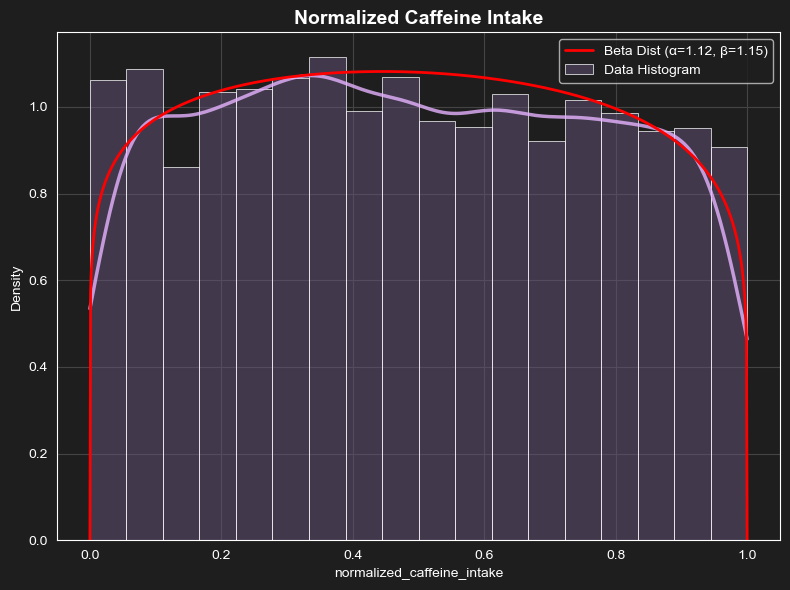

In [106]:
# Normalizing the column
test_column = "Caffeine Intake (mg)"
df["normalized_caffeine_intake"] = (df[test_column] - df[test_column].min()) / (df[test_column].max() - df[test_column].min())

# Create the figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Plot histogram with KDE
sns.histplot(
    data=df["normalized_caffeine_intake"], 
    stat="density",
    kde=True, 
    ax=ax, 
    label="Data Histogram",
    edgecolor="white",  # Thinner, clearer edge lines
    linewidth=0.5  # Make bar edges thinner
)

# Customize the KDE line after plotting the histogram
ax.lines[0].set_color("#e6b3ff")  # Set color for KDE line
ax.lines[0].set_linewidth(2.5)  # Set width for KDE line
ax.lines[0].set_alpha(0.8)  # Set transparency for KDE line

# Manually Adjust Alpha & Beta
alpha_manual = 1.12
beta_manual = 1.15
# Generate Beta distribution curve
x = np.linspace(0, 1, 1000)
beta_pdf = beta.pdf(x, alpha_manual, beta_manual)

# Plot the manually specified Beta distribution curve
ax.plot(x, beta_pdf, label=f"Beta Dist (α={alpha_manual}, β={beta_manual})", color="red", linewidth=2)

# Customize the title
ax.set_title("Normalized Caffeine Intake", fontsize=14, fontweight="bold", color="white")

# Show the plot
plt.legend()
plt.tight_layout()  
plt.show()

The continuous variables also exhibit a similar behavior to the discrete ones. Some show a more probable uniform distribution, while others tend to follow a pattern closer to a beta distribution.

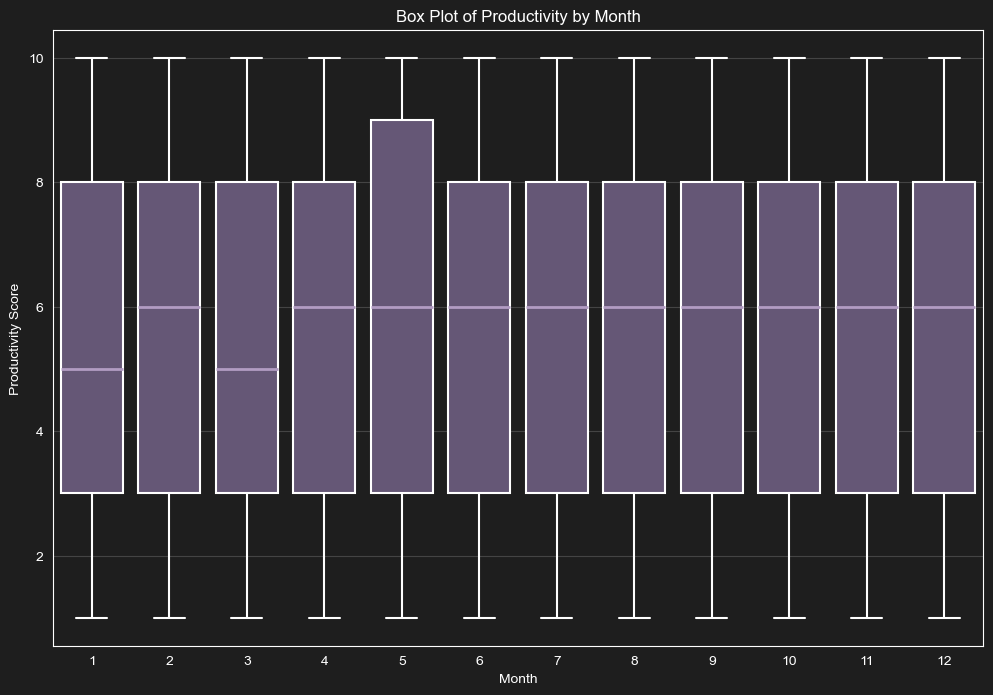

In [88]:
# Convert to datetime
df["Date"] = pd.to_datetime(df["Date"], format="%Y-%m-%d")

# Extract year, month, and day of the year
df["year"] = df["Date"].dt.year  # Keep as an integer
df["month"] = df["Date"].dt.month

# Set up the figure size
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, 
            x="month", 
            y="Productivity Score",
            whiskerprops={"color": "white", "linewidth": 1.5},  
            capprops={"color": "white", "linewidth": 1.5},      
            medianprops={"color": "#b29cc3", "linewidth": 2},    
            boxprops={"edgecolor": "white", "linewidth": 1.5}
           )
# Customize plot
plt.title("Box Plot of Productivity by Month")
plt.xlabel("Month")
plt.ylabel("Productivity Score")
plt.show()
plt.show()

Time variation does not appear to have a strong impact on productivity scores. It seems that during the winter months, the median is slightly lower compared to other months, but the difference is minimal

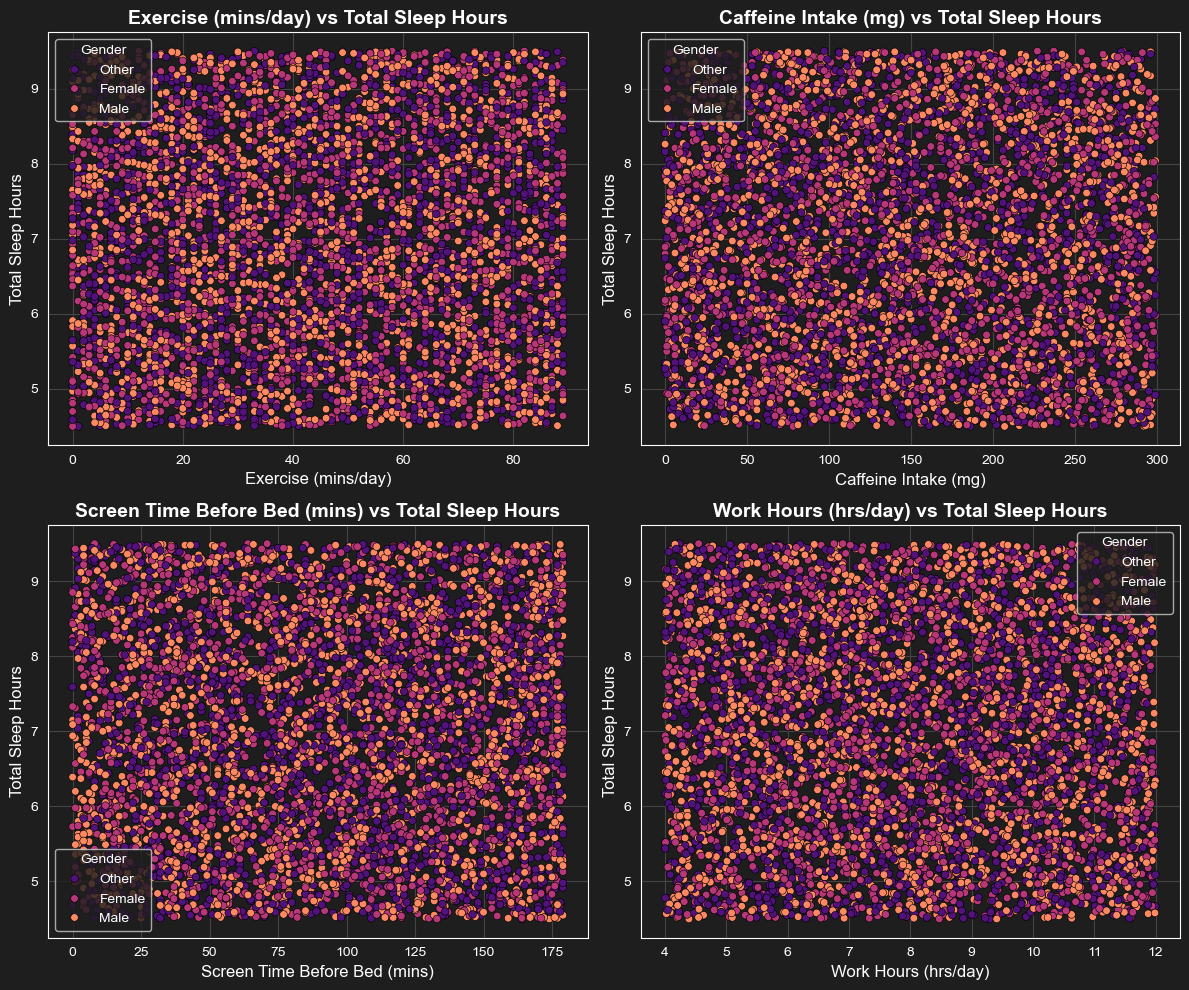

In [117]:
# Create subplots (2 rows, 2 columns)
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Define the pairs of columns to plot
pairs = [
    ('Exercise (mins/day)', 'Total Sleep Hours'),
    ('Caffeine Intake (mg)', 'Total Sleep Hours'),
    ('Screen Time Before Bed (mins)', 'Total Sleep Hours'),
    ('Work Hours (hrs/day)', 'Total Sleep Hours')
]

# Flatten axes array for easier indexing
axes = axes.flatten()

# Loop through the column pairs and create scatterplots
for ax, (col_x, col_y) in zip(axes, pairs):
    sns.scatterplot(
        data=df, 
        x=col_x, 
        y=col_y, 
        hue=df["Gender"],
        palette="magma",
        ax=ax, 
        color="#64527b",  # Custom color for points
         edgecolor="black",  # White edge for points
        s=30  # Point size
    )
    # Customize plot labels and titles
    ax.set_title(f'{col_x} vs {col_y}', fontsize=14, fontweight="bold", color="white")
    ax.set_xlabel(col_x, fontsize=12, color="white")
    ax.set_ylabel(col_y, fontsize=12, color="white")
    
    # Optional: Customize gridlines
    ax.grid(True, color="#444444")  # Softer gridlines

plt.tight_layout()
plt.show()


There is no clear relationship between total sleep time and variables such as exercise, caffeine intake, screen time before bed, or work hours. Gender also does not appear to have any effect on total sleep time